In [31]:
from qiskit import *
from qiskit.visualization import plot_histogram

# Puzzle 3: Quantum Library (Grover's Algorithm)
Grover's algorithm is a quantum search algorithm designed to efficiently explore unsorted or cost-prohibitive databases. It operates with a complexity of O(sqrt(N)), significantly reducing the computational load compared to a linear search (O(N)). However, it's important to note that the algorithm's outcome is probabilistic, and a verification step is necessary. In cases where the result is incorrect, the algorithm is iteratively rerun until a correct outcome is achieved.

Operating Principles of Grover's Algorithm:
- Oracle: The oracle is a crucial operation that flips the phase of the sought-after element before the application of Grover's diffusion step.
- Grover's Diffusion: The diffuser consists of two main steps. Firstly, it calculates the average probability amplitudes and then reflects them symmetrically. This amplifies the probability of the identified element while diminishing that of others.
- These operations can be repeated several times until a sufficient amplitude for the target element is reached. The overall complexity is O(sqrt(N)), owing to the constant complexity (O(1)) of the Grover operation.

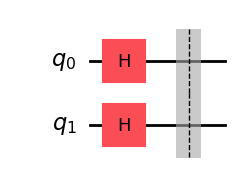

In [32]:
# Quantum Circuit Implementation
# Simulating a database with 4 elements.
# Creating 2 qubits in a superposition state using an H gate to represent 4 possible states.
circ = QuantumCircuit(2)
circ.h([0, 1])

circ.barrier()
circ.draw('mpl', style='iqp')

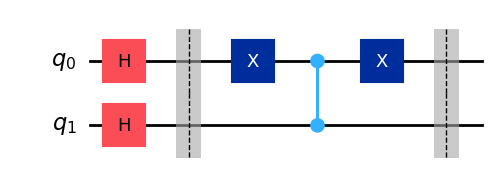

In [33]:
# Applying the Oracle to the state '10'.
# Considering the possible cases: '00', '01', '10', '11'.
# Inverting the phase of the 3rd element '10' (q1=1, q0=0).
# Achieving this by first reversing the value of q0 with a not gate, then applying a CZ gate to invert the phase, and finally reapplying not gate on q0.
circ.x(0)
circ.cz(0, 1)
circ.x(0)

circ.barrier()
circ.draw('mpl', style='iqp')

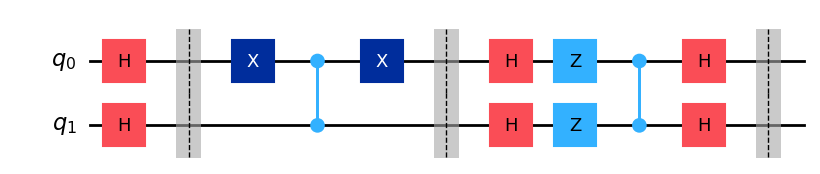

In [34]:
# Applying the diffuser.
# It creates a superposition of all states with the phase of the initial state inverted.
# All possible states undergo the same treatment, resulting in the sum of individual states.
circ.h([0, 1])
circ.z([0, 1])
circ.cz(0, 1)
circ.h([0, 1])

circ.barrier()
circ.draw('mpl', style='iqp')


In [35]:
circ.measure_all()

num_measurements = 20000

backend = Aer.get_backend('qasm_simulator')
job = backend.run(circ)
result = backend.run(transpile(circ, backend), shots=num_measurements).result()
counts = result.get_counts(circ)
all_possible_states = [format(i, '0' + str(circ.num_qubits) + 'b') for i in range(2**circ.num_qubits)]

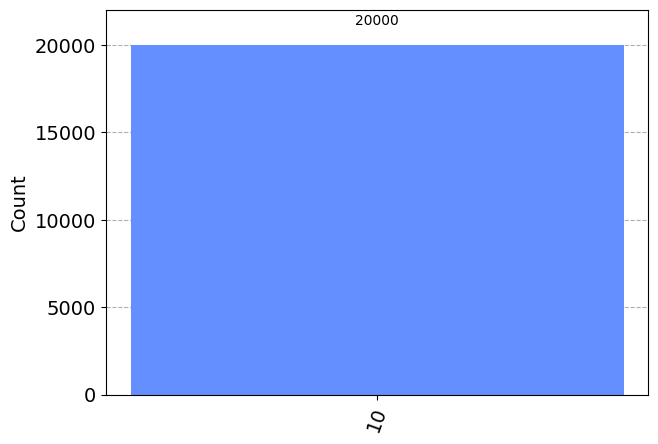

In [37]:
# Initializing probabilities to zero for all possible states
probabilities = {state: 0 for state in all_possible_states}

# Updating probabilities for observed states
for key in counts.keys():
    probabilities[key] = (counts[key]) / num_measurements

plot_histogram(counts)

# Ultimately, we observe a 100% probability of obtaining the element specified by the oracle ('10').